#**Trabalhando com Planilhas do Excel**

In [17]:
# importando a biblioteca pandas
import pandas as pd

In [18]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

# Nova seção

In [19]:
# juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [20]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [21]:
df.tail(10)

,Cidade,Data,Vendas,LojaID,Qtde
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [22]:
# Pegar ums mostra aleatória do data frame
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
224,Natal,2019-01-02,178.30,1035,3
0,Natal,2018-08-27,606.00,853,2
137,Recife,2019-03-02,51.99,983,3
101,Recife,2019-01-01,172.55,983,7
206,Salvador,2019-01-02,151.45,1036,2


In [23]:
# Pegar uma mostra aleatória de 10 itens do data frame
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
136,Fortaleza,2019-03-02,39.09,982,4
124,Aracaju,2018-01-01,139.64,1522,5
67,Fortaleza,2019-01-01,43.51,1003,1
78,Fortaleza,2019-01-01,37.66,1005,2
83,Natal,2019-01-02,63.66,1036,2
120,Recife,2019-03-02,184.90,982,4
137,Recife,2019-03-02,51.99,983,3
16,Fortaleza,2019-01-01,97.32,1002,5
22,Recife,2019-01-01,39.53,983,3
189,Natal,2019-01-02,139.73,1037,2


In [24]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [25]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [26]:
# **Tratando valores faltantes**"
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [27]:
# Criando a coluna de receitas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [28]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
5,Aracaju,2018-01-01,156.20,1522,1,156.20
6,Aracaju,2018-01-01,35.50,1522,2,71.00
7,Aracaju,2019-01-01,172.22,1522,6,1033.32
8,Aracaju,2019-01-01,12.16,1523,1,12.16
9,Aracaju,2019-01-01,149.36,1523,3,448.08


In [29]:
# Criando uma coluna com o que seria a quantidade de itens
df["Receita/Vendas"] = df["Receitas"] / df["Vendas"]

In [30]:
#df.drop(['receitas'], axis=1)

In [31]:
#Retornando a maior receita
df["Receitas"].max()

3544.0

In [32]:
#Retornando a menor receita
df["Receitas"].min()

3.34

In [33]:
# Retornando as 3 maiores receitas
# nlargestn
df.nlargest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [34]:
# Retornando as 3 menores receitas
#nsamllestn",
df.nsmallest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [35]:
# Agrupamento de receita por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [36]:
# Ordenando o conjunto de dados
df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [37]:
# **Trabalhando com datas**"
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [38]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [39]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda
134,Natal,2019-01-02,125.9,1036,1,125.9,1.0,2019


In [40]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
12,Aracaju,2019-01-01,9.78,1520,8,78.24,8.0,2019,1,1
127,Natal,2019-01-02,240.61,1035,3,721.83,3.0,2019,1,2
79,Aracaju,2018-01-01,5.59,1521,4,22.36,4.0,2018,1,1
95,Aracaju,2018-01-01,127.43,1522,9,1146.87,9.0,2018,1,1
50,Recife,2019-01-01,7.24,983,4,28.96,4.0,2019,1,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1
201,Natal,2019-01-02,86.61,1036,1,86.61,1.0,2019,1,2
25,Natal,2019-01-13,611.00,852,2,1222.00,2.0,2019,1,13
155,Salvador,2019-01-02,237.81,1036,3,713.43,3.0,2019,1,2
229,Salvador,2019-01-02,43.08,1036,2,86.16,2.0,2019,1,2


In [42]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [44]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
70,Recife,2019-01-01,20.40,983,7,142.80,7.0,2019,1,1,365 days
62,Natal,2018-02-10,793.00,854,4,3172.00,4.0,2018,2,10,40 days
31,Recife,2019-01-01,176.23,981,7,1233.61,7.0,2019,1,1,365 days
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019,1,1,365 days
221,Salvador,2019-01-02,142.23,1035,2,284.46,2.0,2019,1,2,366 days
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2.0,2019,1,1,365 days
60,Aracaju,2018-01-01,215.88,1521,3,647.64,3.0,2018,1,1,0 days
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1,365 days
176,Salvador,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days


In [45]:
# Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [46]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
117,Natal,2019-01-02,39.41,1034,1,39.41,1.0,2019,1,2,366 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
145,Salvador,2019-01-02,84.62,1034,2,169.24,2.0,2019,1,2,366 days,1
82,Recife,2019-01-01,29.55,981,6,177.30,6.0,2019,1,1,365 days,1
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,4.0,2019,1,1,365 days,1
77,Aracaju,2018-01-01,24.10,1522,1,24.10,1.0,2018,1,1,0 days,1
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2.0,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days,1


In [47]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1
5,Aracaju,2018-01-01,156.20,1522,1,156.20,1.0,2018,1,1,0 days,1
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018,1,1,0 days,1
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1


In [48]:
df.tail(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
230,Salvador,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3,367 days,1
231,Salvador,2019-01-03,89.85,1034,2,179.70,2.0,2019,1,3,367 days,1
232,Salvador,2019-01-03,167.76,1034,3,503.28,3.0,2019,1,3,367 days,1
233,Salvador,2019-01-03,172.40,1036,2,344.80,2.0,2019,1,3,367 days,1
234,Salvador,2019-01-03,48.39,1035,2,96.78,2.0,2019,1,3,367 days,1
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1
239,Salvador,2019-01-03,161.41,1037,3,484.23,3.0,2019,1,3,367 days,1


In [49]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [50]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
134,Salvador,2019-03-02,125.90,1036,1,125.90,1.0,2019,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2,425 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,1.0,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30,453 days,1


In [51]:
# -------------------------------------------------------------
#**Visualização de dados**

In [52]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

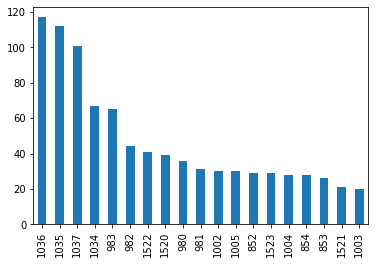

In [53]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

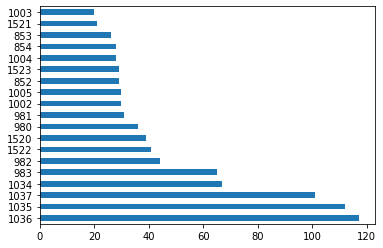

In [54]:
# Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

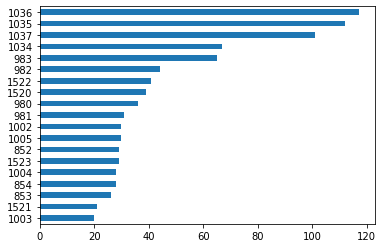

In [56]:
# Gráfico de barras horizontais em ordem
df["LojaID"].value_counts(ascending=True).plot.barh();

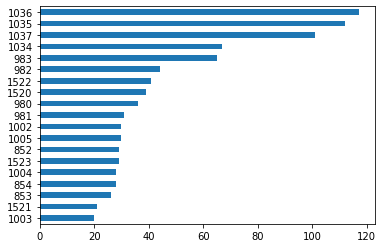

In [57]:
# Gráfico de barras horizontais em ordem (sem a linha de legenda)
df["LojaID"].value_counts(ascending=True).plot.barh();

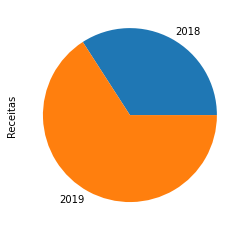

In [58]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie()

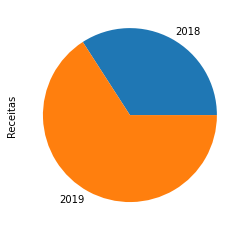

In [59]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie();

In [60]:
# Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

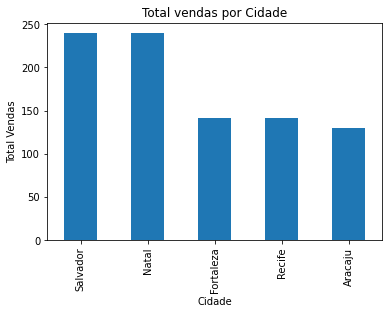

In [61]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title = "Total vendas por Cidade"),
plt.xlabel("Cidade"),
plt.ylabel("Total Vendas");

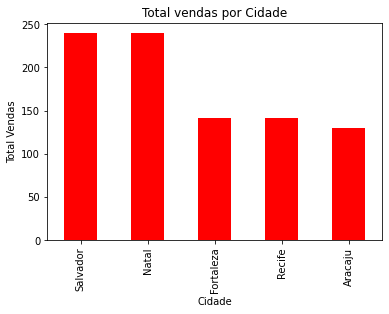

In [62]:
# Alterando a cor para vermelho

df["Cidade"].value_counts().plot.bar(title = "Total vendas por Cidade", color="red"),
plt.xlabel("Cidade"),
plt.ylabel("Total Vendas");

In [63]:
#Alterando o estilo
plt.style.use("ggplot")

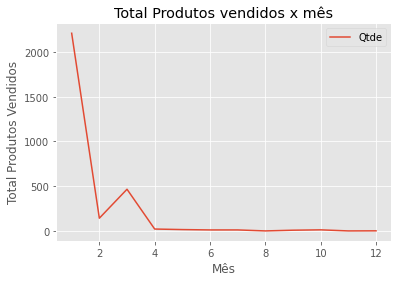

In [64]:
# Agrupando a quantidade de vendas por mês

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês"),
plt.xlabel("Mês"),
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [65]:
# Totalizando
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [66]:
#Selecionando apenas as vendas de 2019 e criando um novo data frame
df_2019 = df[df["Ano_Venda"] == 2019]

In [67]:
# Totalizando a quantidade de vendas por mês do data frame 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

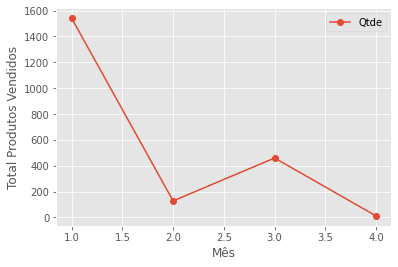

In [68]:
#Total produtos vendidos por mês usando o data frame 2019 e com marcador no gráfico
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o"),
plt.xlabel("Mês"),
plt.ylabel("Total Produtos Vendidos");
plt.legend()

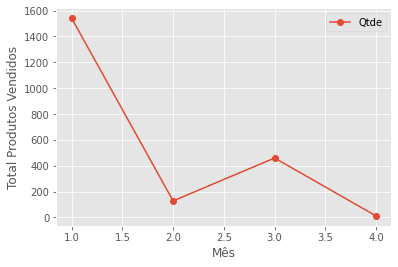

In [69]:
#Total produtos vendidos por mês usando o data frame 2019 e com marcador no gráfico
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o"),
plt.xlabel("Mês"),
plt.ylabel("Total Produtos Vendidos")
plt.legend();

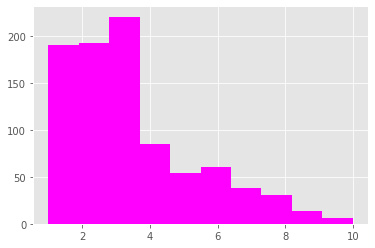

In [74]:
# Histograma
plt.hist(df["Qtde"], color = "magenta");

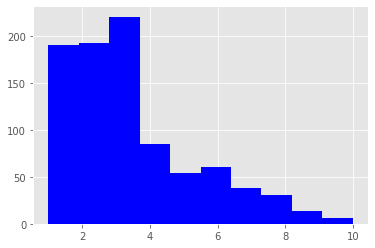

In [72]:
# Histograma
plt.hist(df["Qtde"], color = "blue");

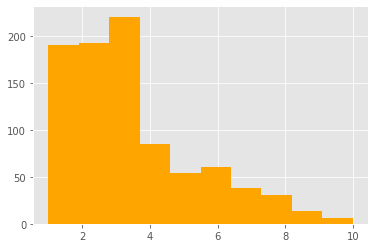

In [75]:
# Histograma
plt.hist(df["Qtde"], color = "orange");


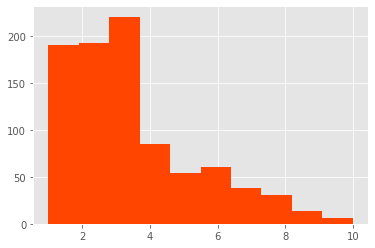

In [76]:
# Histograma
plt.hist(df["Qtde"], color = "orangered");


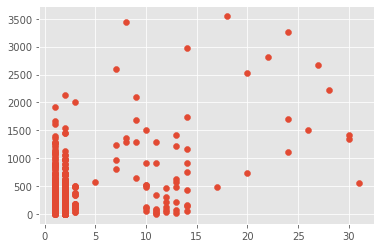

In [77]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receitas"]);

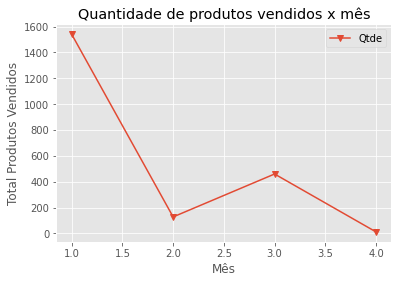

In [78]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v"),
plt.title("Quantidade de produtos vendidos x mês"),
plt.xlabel("Mês"),
plt.ylabel("Total Produtos Vendidos");

plt.legend();
plt.savefig("grafico QTDE x MES.png")

## *** Analise exploratoria

In [79]:
#Importando as bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [80]:
# Upload do arquivo 
from google.colab import files 
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [81]:
# Criando nosso DataFrame 
df = pd.read_excel("AdventureWorks.xlsx")

In [82]:
df.head(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
5,2008-07-12,2008-07-20,306,384,19054,200807123CS588,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
6,2008-08-14,2008-08-21,307,384,19103,200808143CS628,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
7,2008-09-29,2008-10-09,307,384,19106,200809293CS637,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
8,2008-10-09,2008-10-19,307,384,19106,200810093CS637,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
9,2008-10-16,2008-10-27,307,384,19107,200810163CS646,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [83]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [84]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [85]:
#Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

In [86]:
# Qual o custo Total? 
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 

In [87]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [88]:
# Qual o custo Total? 
round(df["custo"].sum(), 2)

2486783.05

In [89]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total 
#Vamos criar uma coluna de Lucro que será Receita - Custo 
df["lucro"]  = df["Valor Venda"] - df["custo"]

In [90]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [91]:
#Total Lucro 
round(df["lucro"].sum(),2)

3497823.09

In [92]:
# Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [93]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [94]:
# **Agora, queremos saber a média do tempo de envio para cada marca
# para isso precisamos transformar a coluna Tempo_envio em números
#Extraindo apenas os dias 
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [95]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [96]:
# Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [97]:
# Média do tempo de envio agrupando por marca
df.groupby("Marca")["Tempo_envio"].mean()


Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [98]:
# Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [99]:
#Vamos Agrupar por ano e marca totalizando o lucro 
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [100]:
# Formatando a saída de dados numéricos com casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [101]:
#Vamos Agrupar por ano e marca 
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [102]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index(),
lucro_ano

(   Data Venda            Marca                lucro
 0        2008  Adventure Works           306,641.16
 1        2008          Contoso            56,416.00
 2        2008         Fabrikam         1,557,020.55
 3        2009  Adventure Works           405,395.08
 4        2009          Contoso           138,258.95
 5        2009         Fabrikam         1,034,091.35,)

In [103]:
# Qual o total de produtos vendidos? 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

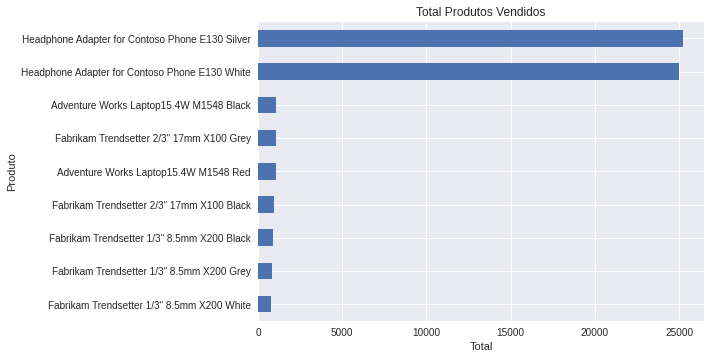

In [104]:
# Gráfico Total de produtos vendidos 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos"),
plt.xlabel("Total"),
plt.ylabel("Produto");

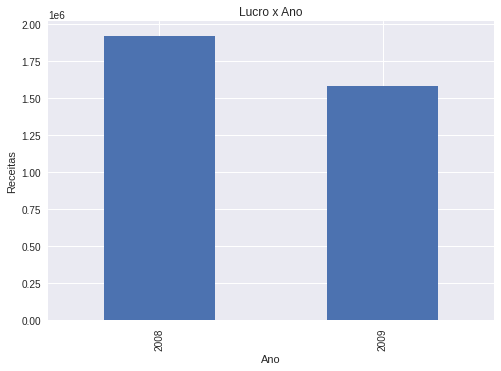

In [105]:
# Apurando o lucro anual em forma gráfica
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano"),
plt.xlabel("Ano"),
plt.ylabel("Receitas");

In [106]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [107]:
# Selecionando apenas as vendas de 2009 
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [108]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


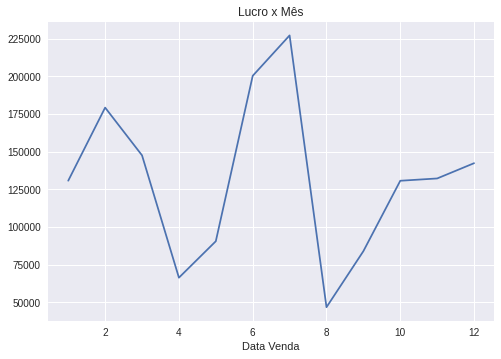

In [110]:
# Gerando um total do lucro mensal em forma gráfica
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês");

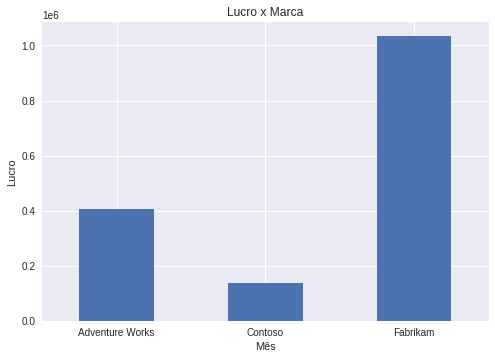

In [112]:
# Gerando um total do lucro mensal em forma gráfica trocando os labels 
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

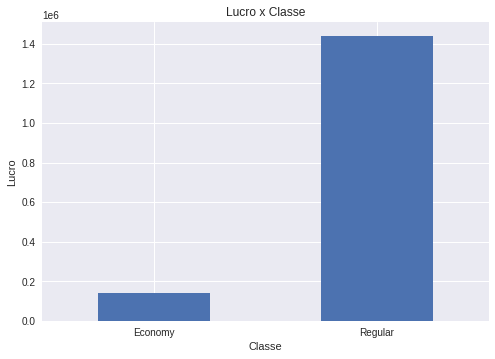

In [113]:
# Gerando um total do lucro mensal por classe em forma gráfica trocando os labels 
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');


In [115]:
# Verificando estatísticas do tempo de envio
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

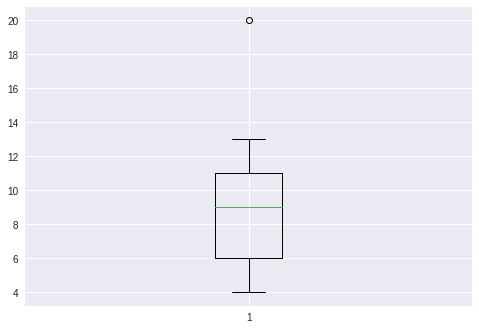

In [116]:
#Gráfico de Boxplot 
plt.boxplot(df["Tempo_envio"]);

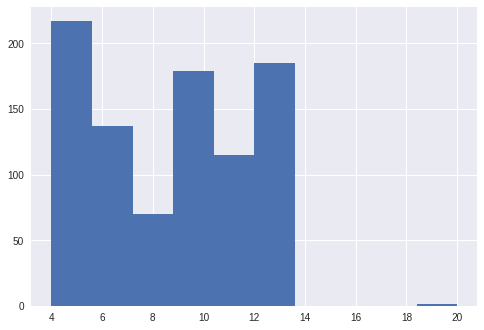

In [117]:
# Histograma 
plt.hist(df["Tempo_envio"]);

In [118]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [119]:
# Tempo máximo de envio
df['Tempo_envio'].max()

20

In [124]:
# Achando o tempo de envio com valor 20
df.loc[df['Tempo_envio'] == 20]


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [125]:
# Outra forma de identificar o tempo de envio = 20
df[df["Tempo_envio"] == 20]


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [126]:
# Exportando o data frame para um arquivo CSV
df.to_csv("df_vendas_novo.csv", index=False)